# Contact Integrators

## Herglotz variational principle
...



First we define the system's potential energy $V(x)$. In the case of the usual pendulum we have

\begin{equation}
    V(\theta) = \frac{1}{2} \big(1 - cos(\theta)\big)
\end{equation}

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def V(x):
    return 0.5*(1.-np.cos(x))
    #return 0.5*x**2.

def V_der(x):
    return 0.5*(np.sin(x))
    #return x

Given the above definition, the Lagrangian function will be given by

In [59]:
def L(x_0,x_1,z_0,z_1,alpha):
    a = (x_1-x_0)/h
    b = V(x_0) + V(x_1)
    c = z_0**2 + z_1**2.
    return 0.5*a**2. - 0.5*b - 0.25*alpha*c

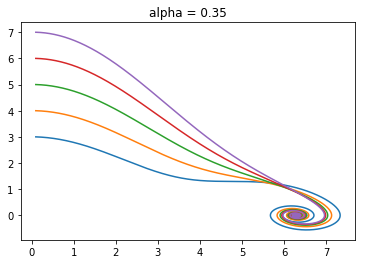

In [65]:
h = 0.001
n_step = 50000
n_particles = 5

fig = plt.figure()
axs = fig.gca()

X = []
P = []
Z = []
alpha = 0.35
axs.set_title('alpha = ' + str(alpha)) 
Max = 0
Min = 0
for k in range(n_particles):
    x0 = 0.1
    p0 = (k+3.)*1.
    z0 = 0.1
    x = x0*np.ones(n_step)
    p = p0*np.ones(n_step)
    z = z0*np.ones(n_step)

    for i in range(1,n_step):
        x[i] = x[i-1] + h*(1. - 0.5*h*alpha*z[i-1])*p[i-1] - 0.5*h**2.*V_der(x[i-1])
        p[i] = ((1. - 0.5*h*alpha*z[i-1])*p[i-1] - 0.5*h*(V_der(x[i-1]) + V_der(x[i])))/(1. + 0.5*h*alpha*z[i])
        z[i] = z[i-1] + h*L(x[i-1],x[i],z[i-1],z[i],alpha)
    X.append(x)
    P.append(p)
    Z.append(z)
    
    plt.plot(X[k],P[k])
plt.show()